In [4]:
import pandas as pd

df = pd.read_csv("macro_global_cleaned_hashtags.csv")

In [5]:
# Assuming you have other features and a target variable
X = df.drop(['Average_Engagement_Rate', 'Hashtags_(dictionary)'], axis=1)  # Add other numerical features
y = df['Average_Engagement_Rate']

# Fill missing values if necessary
X = X.fillna(0)
y = y.fillna(0)


Mean Squared Error: 7.782293019999997
R-squared: 0.9290124150496705


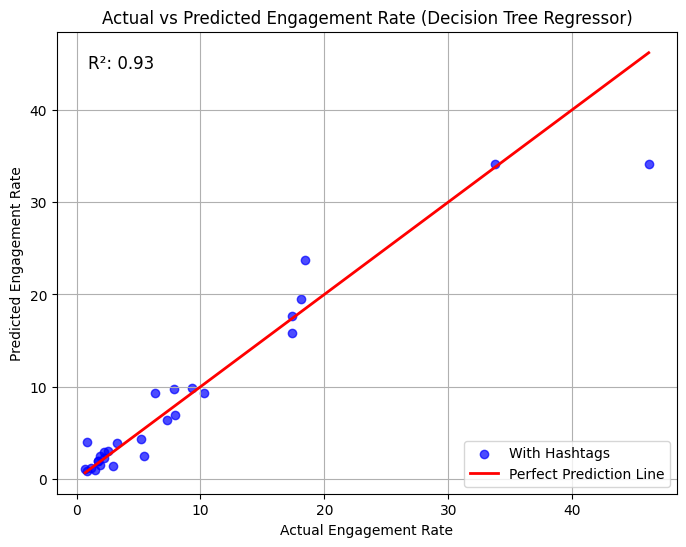

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

def process_hashtags(hashtags_column):
    # Convert the string representation of the dictionary into an actual dictionary
    hashtags_column = hashtags_column.apply(eval)  # Only if it's a string representation of a dictionary
    
    #Count the number of unique hashtags (length of the dictionary)
    hashtags_column = hashtags_column.apply(lambda x: len(x) if isinstance(x, dict) else 0)
    
    return hashtags_column

# Process the hashtags column in df
df['Hashtags_Count'] = process_hashtags(df['Hashtags_(dictionary)'])

df = df.drop(columns=['Hashtags_(dictionary)'])

# Drop 'Average_Engagement_Rate' from features to create independent variables
X = df.drop('Average_Engagement_Rate', axis=1)  # Independent variables (features)
y = df['Average_Engagement_Rate']  # Dependent variable (target)

# Model with hashtags only
X_with_hashtags = X  # Includes Hashtags_Count

# Split data for the model with hashtags
X_train, X_test, y_train, y_test = train_test_split(X_with_hashtags, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model with hashtags
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_with_hashtags = model.predict(X_test)

# Print performance metrics with hashtags
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_with_hashtags)}')
print(f'R-squared: {r2_score(y_test, y_pred_with_hashtags)}')

# Optionally, plot to compare the performance
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_with_hashtags, color='blue', alpha=0.7, label='With Hashtags')

# Perfect prediction line (where predicted = actual)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

# Adding R-squared to the plot
plt.text(0.05, 0.95, f'R²: {r2_score(y_test, y_pred_with_hashtags):.2f}', horizontalalignment='left', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# Labeling axes
plt.title('Actual vs Predicted Engagement Rate (Decision Tree Regressor)')
plt.xlabel('Actual Engagement Rate')  # Actual values
plt.ylabel('Predicted Engagement Rate')  # Predicted values

# Display legend and grid
plt.legend()
plt.grid(True)
plt.show()
